In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
print(os.listdir(r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\asl_alphabet_train\asl_alphabet_train"))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [2]:
train_dir = "C:\\Users\\Dell\\Desktop\\zzzzz\\projet tutoré\\interpetation using python\\asl_alphabet_train1\\asl_alphabet_train"
test_dir="C:\\Users\\Dell\\Desktop\\zzzzz\\projet tutoré\\interpetation using python\\asl_alphabet_test\\asl_alphabet_test"

unique_labels =  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


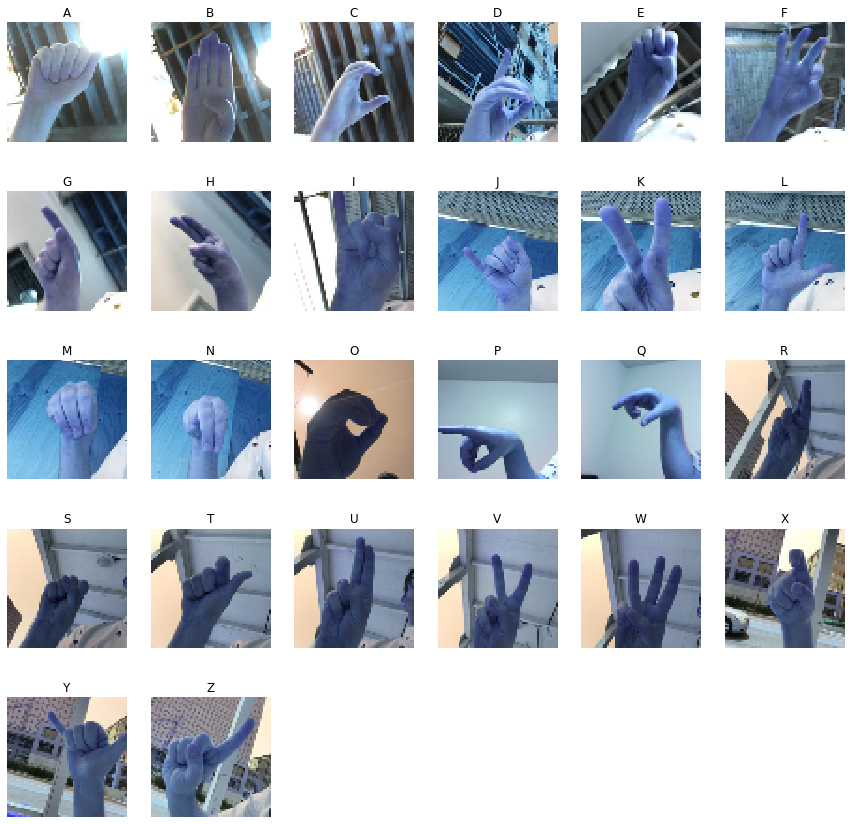

In [3]:
def load_unique():
    size_img = 64
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
        p1=train_dir+"\\"+folder
        newp1= p1.replace(os.sep, '/')
        for image in os.listdir(newp1):
            p2=train_dir+"\\"+folder+"\\"+image
            newp2= p2.replace(os.sep, '/')
            final_img = plt.imread(newp2)
            if final_img is not None:
                final_img = cv2.resize(final_img, (size_img,size_img))
                final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
                images_for_plot.append(final_img)
                labels_for_plot.append(folder)
                break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
print("unique_labels = ", labels_for_plot)

fig = plt.figure(figsize = (15,15))
def plot_images(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)
    return

image_index = 0
row = 5
col = 6
for i in range(1,(row*col-3)):
    plot_images(fig, images_for_plot[image_index], labels_for_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()

In [3]:
labels_dict = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,
                   'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'T':19,'U':20,'V':21,'W':22,'X':23,'Y':24,
                   'Z':25}

images = []
labels = []
size_img = 64
print("LOADING DATA FROM : ",end = "")
p3=train_dir
newp3= p3.replace("\\", '/')
for folder in os.listdir(newp3):
    i=0;
    p1=train_dir+"\\"+folder
    newp1= p1.replace("\\", '/')
    for image in os.listdir(newp1):            
        p2=train_dir+"\\"+folder+"\\"+image
        newp2= p2.replace("\\", '/')
        temp_img = plt.imread(newp2)
        if temp_img is not None:
            temp_img = cv2.resize(temp_img, (size_img,size_img))
            temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
            images.append(temp_img)
            labels.append(labels_dict[folder])
        i=i+1
        if(i==1000):
            break
images = np.array(images)
images = images.astype('float32')/255.0
print("")
print(len(images))
print(len(labels))
labels = tf.keras.utils.to_categorical(labels,num_classes=26)
    
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.05)
    
print()
print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)

LOADING DATA FROM : 
26000
26000

Loaded 24700 images for training, Train data shape = (24700, 64, 64, 3)
Loaded 1300 images for testing Test data shape = (1300, 64, 64, 3)


In [9]:
def create_model():
    
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(tf.keras.layers.Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size = [3,3]))
    
    model.add(tf.keras.layers.Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size = [3,3]))
    
    model.add(tf.keras.layers.Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size = [3,3]))
    
    model.add(tf.keras.layers.BatchNormalization())
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(512, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.Dense(26, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = tf.keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

def fit_model():
    model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 30, validation_split = 0.1)
    return model_hist 

In [10]:
model = create_model()
curr_model_hist = fit_model()
model.save(r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\model.pb")

MODEL CREATED
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7

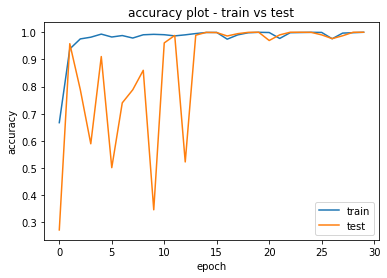

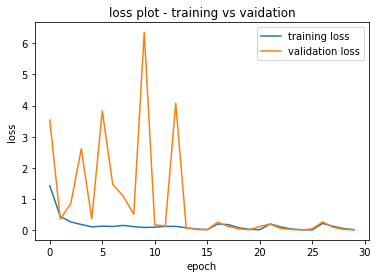

In [11]:
plt.plot(curr_model_hist.history['accuracy'])
plt.plot(curr_model_hist.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy') 
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [17]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))


Evaluation Accuracy =  99.92% 
Evaluation loss =  0.018620


In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
path=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\converted_model3.tflite"
open(path, "wb").write(tflite_model)

3766764

In [ ]:

from tensorflow.keras.applications.vgg19 import VGG19

img_height = 64
img_width = 64
img_channels = 3
num_classes = 26
learning_rate = 1e-5
weights = 'C:/Users/Dell/Desktop/zzzzz/projet tutoré/interpetation using python/vgg19/vgg19.h5'

def build_model():
    base = VGG19(include_top = False, weights = weights, input_shape = (img_height, img_width, img_channels))
    X = base.output
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(512, activation = 'relu')(X)
    X = tf.keras.layers.Dropout(0.4)(X)
    X = tf.keras.layers.BatchNormalization()(X)
    X = tf.keras.layers.Dense(512, activation = 'relu')(X)
    X = tf.keras.layers.Dropout(0.3)(X)
    X = tf.keras.layers.BatchNormalization()(X)
    preds = tf.keras.layers.Dense(26, activation = 'softmax')(X)
    model = tf.keras.models.Model(inputs = base.input, outputs = preds)
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

model = build_model()
model.summary()
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, verbose = 0, restore_best_weights = True)]

history = model.fit(X_train, Y_train,
                    epochs = 15,
                    batch_size = 128,
                    validation_split = 0.05,
                    callbacks = callbacks)

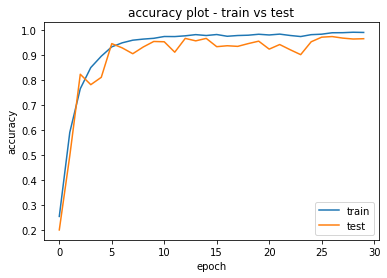

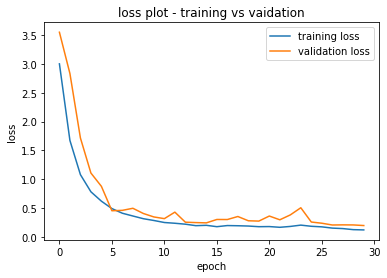

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='lower right')
plt.title('accuracy plot - train vs test')
plt.xlabel('epoch')
plt.ylabel('accuracy') 
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.title('loss plot - training vs vaidation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
evaluate_metrics = model.evaluate(X_test, Y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluation loss = " ,"{:.6f}".format(evaluate_metrics[0]))

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
path=r"C:\Users\Dell\Desktop\zzzzz\projet tutoré\interpetation using python\interpModel\converted_model2.tflite"
open(path, "wb").write(tflite_model)

In [11]:
def load_test_data():
    images = []
    names = []
    size = 64
    p4=test_dir
    newp4= p4.replace("\\", '/')
    for image in os.listdir(newp4):
        p5=test_dir+"\\"+image
        newp5= p5.replace("\\", '/')
        temp = plt.imread(newp5)
        if temp is not None:
            temp = cv2.resize(temp, (size,size))
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
            images.append(temp)
            names.append(image)
    images = np.array(images)
    images = images.astype('float32')/255.0
    return images, names

test_images, test_img_names = load_test_data()

In [12]:
predictions = [model.predict_classes(image.reshape(1,64,64,3))[0] for image in test_images]

In [13]:
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

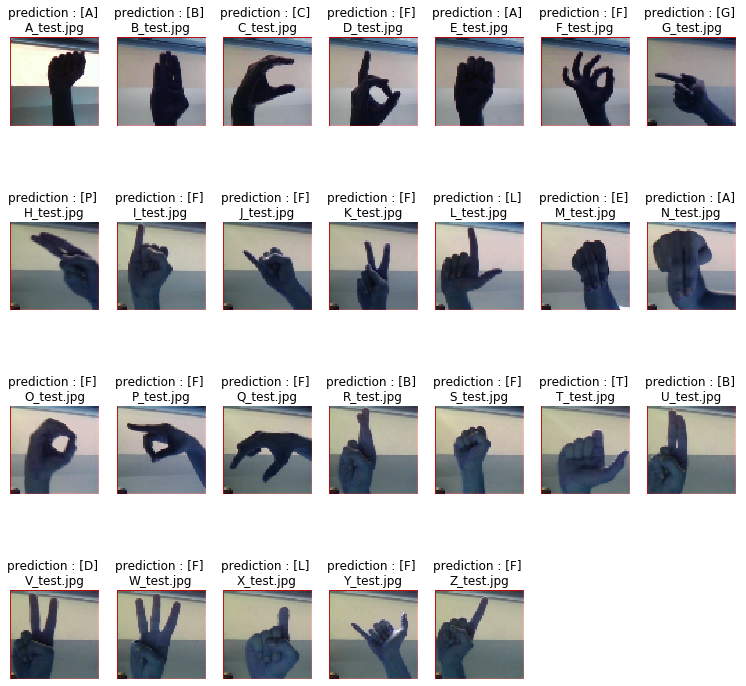

In [14]:
predfigure = plt.figure(figsize = (13,13))
def plot_image_1(fig, image, label,  predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return
image_index = 0
row = 4
col = 7
for i in range(1,(row*col-1)):
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index],  predictions_labels_plot[image_index], row, col, i)
    image_index = image_index + 1
plt.show()